## 1. Описание набора данных

Данные описывают рынок недвижимости в городе Мадрид, Испания.Данные опубликованы в открытом доступе на платформе Kaggle.Они содержат информацию о различных атрибутах недвижимости. Эти данные могут быть полезными для анализа и моделирования рынка недвижимости в Мадриде, включая оценку стоимости и прогнозирование тенденций.


Признак  | Описание
-------------------|--------------------
id	| Идентификатор
title |	Заголовок объявления
subtitle	|Район и город
sq_mt_built	|Площадь в квадратных метрах (строительная)
sq_mt_useful	|Полезная площадь в квадратных метрах
n_rooms|	Количество комнат
n_bathrooms	|Количество ванных комнат
n_floors	|Количество этажей
sq_mt_allotment|	Площадь участка
latitude, longitude |	Широта и долгота (так как порталы в основном скрывают местоположение, большинство значений - NAs)
raw_address|	Адрес недвижимости
is_exact_address_hidden|	Булево значение, указывающее, скрыт ли точный адрес
street_name	|Название улицы
street_number	|Номер улицы
portal	|Портал
floor|	Этаж
is_floor_under|	Булево значение, указывающее, является ли этаж поднимающимся
door	|Дверь
neighborhood_id	|Идентификатор района
operation	|Тип операции (аренда или продажа)
rent_price|	Цена аренды
rent_price_by_area|	Цена аренды за единицу площади (неизвестна)
is_rent_price_known	|Булево значение, указывающее, известна ли цена аренды
buy_price	|Цена покупки
buy_price_by_area |	Цена покупки за единицу площади
is_buy_price_known|	Булево значение, указывающее, известна ли цена покупки
house_type_id	 |Идентификатор типа недвижимости
is_renewal_needed	|Булево значение, указывающее, требуется ли ремонт недвижимости
is_new_development |	Булево значение, указывающее, является ли недвижимость новостройкой
built_year	|Год постройки недвижимости
has_central_heating	|Булево значение, указывающее, есть ли центральное отопление
has_individual_heating	|Булево значение, указывающее, есть ли индивидуальное отопление
are_pets_allowed	|Булево значение, указывающее, разрешены ли домашние животные
has_ac	|Булево значение, указывающее, есть ли кондиционер
has_fitted_wardrobes|	Булево значение, указывающее, есть ли встроенные шкафы
has_lift	|Булево значение, указывающее, есть ли лифт в здании
is_exterior	|Булево значение, указывающее, является ли недвижимость внешней
has_garden|	Булево значение, указывающее, есть ли сад
has_pool|	Булево значение, указывающее, есть ли бассейн
has_terrace	|Булево значение, указывающее, есть ли терраса
has_balcony	|Булево значение, указывающее, есть ли балкон
has_storage_room|	Булево значение, указывающее, есть ли кладовка
is_furnished	|Булево значение, указывающее, является ли недвижимость меблированной
is_kitchen_equipped|	Булево значение, указывающее, есть ли оборудованная кухня
is_accessible|	Булево значение, указывающее, доступна ли недвижимость для инвалидов
has_green_zones|	Булево значение, указывающее, есть ли зеленые зоны
energy_certificate|	Сертификат энергетической эффективности недвижимости
has_parking	|Булево значение, указывающее, есть ли парковка
has_private_parking|	Булево значение, указывающее, есть ли частная парковка
has_public_parking|	Булево значение, указывающее, есть ли общественная парковка
is_parking_included_in_price|	Булево значение, указывающее, включена ли парковка в цену
parking_price	|Цена парковки
is_orientation_north|	Булево значение, указывающее, ориентирована ли недвижимость на север
is_orientation_west|	Булево значение, указывающее, ориентирована ли недвижимость на запад
is_orientation_south|	Булево значение, указывающее, ориентирована ли недвижимость на юг
is_orientation_east	|Булево значение, указывающее, ориентирована ли недвижимость на восток


## 2. Загрузка и предварительная обработка данных

Импортируем библиотеки

In [19]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

Считываем данных из файла CSV и ознакомимся с информацией о данных

In [2]:
data = pd.read_csv('/content/drive/MyDrive/houses_Madrid.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    21742 non-null  int64  
 1   id                            21742 non-null  int64  
 2   title                         21742 non-null  object 
 3   subtitle                      21742 non-null  object 
 4   sq_mt_built                   21616 non-null  float64
 5   sq_mt_useful                  8228 non-null   float64
 6   n_rooms                       21742 non-null  int64  
 7   n_bathrooms                   21726 non-null  float64
 8   n_floors                      1437 non-null   float64
 9   sq_mt_allotment               1432 non-null   float64
 10  latitude                      0 non-null      float64
 11  longitude                     0 non-null      float64
 12  raw_address                   16277 non-null  object 
 13  i

In [3]:
pd.set_option("display.max_columns", None)
data.head()

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,longitude,raw_address,is_exact_address_hidden,street_name,street_number,portal,floor,is_floor_under,door,neighborhood_id,operation,rent_price,rent_price_by_area,is_rent_price_known,buy_price,buy_price_by_area,is_buy_price_known,house_type_id,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,are_pets_allowed,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_furnished,is_kitchen_equipped,is_accessible,has_green_zones,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,0,21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,NaN,NaN,"Calle de Godella, 64",False,Calle de Godella,64,NaN,3,False,NaN,Neighborhood 135: San Cristóbal (1308.89 €/m2)...,sale,471,NaN,False,85000,1328,True,HouseType 1: Pisos,False,False,1960.0,NaN,NaN,NaN,True,NaN,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,False,NaN,NaN,NaN,NaN,False,True,False,False
1,1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,NaN,NaN,Calle de la del Manojo de Rosas,True,Calle de la del Manojo de Rosas,NaN,NaN,4,False,NaN,Neighborhood 132: Los Ángeles (1796.68 €/m2) -...,sale,666,NaN,False,129900,1856,True,HouseType 1: Pisos,True,False,NaN,NaN,NaN,NaN,NaN,True,True,True,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,54.0,2,2.0,NaN,NaN,NaN,NaN,"Calle del Talco, 68",False,Calle del Talco,68,NaN,1,False,NaN,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,sale,722,NaN,False,144247,1535,True,HouseType 1: Pisos,False,False,NaN,False,True,NaN,NaN,True,True,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,NaN,NaN,NaN,Calle Pedro Jiménez,True,Calle Pedro Jiménez,NaN,NaN,Bajo,True,NaN,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,sale,583,NaN,False,109900,1717,True,HouseType 1: Pisos,False,False,1955.0,NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,True,NaN,NaN,True,NaN,en trámite,False,NaN,NaN,NaN,NaN,False,False,True,False
4,4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,NaN,NaN,Carretera de Villaverde a Vallecas,True,Carretera de Villaverde a Vallecas,NaN,NaN,4,False,NaN,Neighborhood 133: Los Rosales (1827.79 €/m2) -...,sale,1094,NaN,False,260000,2407,True,HouseType 1: Pisos,False,False,2003.0,NaN,NaN,NaN,True,True,True,True,NaN,True,NaN,NaN,True,NaN,NaN,NaN,True,en trámite,True,NaN,NaN,True,0.0,True,True,True,True


Удалим ненужные столбцы. 
Выбрали столбцы, которые содержат информацию, не имеющую значимого влияния на предсказание цен недвижимости. Некоторые из этих признаков могут быть ненужными, потому что они содержат идентификаторы (например, 'id'), уникальные заголовки или подзаголовки объявлений ('title', 'subtitle'), а также географические координаты ('latitude', 'longitude'), которые могут быть менее важными для предсказания цен. Также удалены столбцы, которые содержат большое количество пропущенных значений или имеют низкую информативность для предсказания цен (например, 'is_floor_under', 'are_pets_allowed', 'is_furnished' и другие).

In [4]:
# Список ненужных столбцов для удаления
columns_to_drop = ['Unnamed: 0','id','title','subtitle','latitude', 'longitude','raw_address','is_exact_address_hidden',
                   'street_name', 'street_number','portal','is_floor_under','door','neighborhood_id','operation',
                   'rent_price_by_area','is_rent_price_known','is_buy_price_known','house_type_id','are_pets_allowed',
                   'has_ac','is_exterior','is_furnished','is_kitchen_equipped','energy_certificate',
                   'has_private_parking','has_public_parking','n_floors', 'sq_mt_allotment', 'built_year', 'parking_price']

# Удаление ненужных столбцов
data = data.drop(columns=columns_to_drop)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   sq_mt_built                   21616 non-null  float64
 1   sq_mt_useful                  8228 non-null   float64
 2   n_rooms                       21742 non-null  int64  
 3   n_bathrooms                   21726 non-null  float64
 4   floor                         19135 non-null  object 
 5   rent_price                    21742 non-null  int64  
 6   buy_price                     21742 non-null  int64  
 7   buy_price_by_area             21742 non-null  int64  
 8   is_renewal_needed             21742 non-null  bool   
 9   is_new_development            20750 non-null  object 
 10  has_central_heating           13608 non-null  object 
 11  has_individual_heating        13608 non-null  object 
 12  has_fitted_wardrobes          13399 non-null  object 
 13  h

Заменим пропущенные значения в числовых столбцах средним

In [6]:
data['sq_mt_built'] = data['sq_mt_built'].fillna(data['sq_mt_built'].mean())
data['sq_mt_useful'] = data['sq_mt_useful'].fillna(data['sq_mt_useful'].mean())

Заменим пропущенные значения в категориальных столбцах модой

In [8]:
data['floor'] = data['floor'].fillna(data['floor'].mode()[0])
data['is_new_development'] = data['is_new_development'].fillna(data['is_new_development'].mode()[0])

Заменим пропущенные значения в булевых столбцах значением False

In [9]:
data['is_renewal_needed'] = data['is_renewal_needed'].fillna(False)
data['has_central_heating'] = data['has_central_heating'].fillna(False)
data['has_individual_heating'] = data['has_individual_heating'].fillna(False)
data['has_fitted_wardrobes'] = data['has_fitted_wardrobes'].fillna(False)
data['has_lift'] = data['has_lift'].fillna(False)
data['has_garden'] = data['has_garden'].fillna(False)
data['has_pool'] = data['has_pool'].fillna(False)
data['has_terrace'] = data['has_terrace'].fillna(False)
data['has_balcony'] = data['has_balcony'].fillna(False)
data['has_storage_room'] = data['has_storage_room'].fillna(False)
data['is_accessible'] = data['is_accessible'].fillna(False)
data['has_green_zones'] = data['has_green_zones'].fillna(False)
data['is_parking_included_in_price'] = data['is_parking_included_in_price'].fillna(False)
data['is_orientation_north'] = data['is_orientation_north'].fillna(False)
data['is_orientation_west'] = data['is_orientation_west'].fillna(False)
data['is_orientation_south'] = data['is_orientation_south'].fillna(False)
data['is_orientation_east'] = data['is_orientation_east'].fillna(False)

Выведем уникальные значения столбцов 

In [11]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Уникальные значения столбца {column}: {unique_values}")

Уникальные значения столбца sq_mt_built: [ 64.          70.          94.         108.         126.
 120.         125.          84.          85.          69.
 122.         123.         109.         115.          65.
  75.          60.          95.          76.          51.
 134.          62.         112.          61.          72.
  71.          87.          78.          52.          97.
  93.         103.          83.          45.          74.
 158.         107.         105.         111.         117.
 118.         106.         114.         150.         140.
  58.         110.         173.          90.          92.
  54.         102.          80.          16.          99.
 143.         100.         176.         113.         129.
  73.          98.          77.         133.          59.
  79.         121.         104.          66.         130.
  49.         151.         170.          48.          50.
 136.          56.          43.          91.          25.
  82.          89.         178.

Заполненим пропущенные значения в столбце n_bathrooms медианой

In [14]:
median_bathrooms = data['n_bathrooms'].median()
data['n_bathrooms'].fillna(median_bathrooms, inplace=True)

floor_mapping = {
    'Entreplanta interior': 2,
    'Entreplanta': 2,
    'Semi-sótano exterior': -1,
    'Sótano interior': -1,
    'Semi-sótano interior': -1,
    'Sótano': -1,
    'Sótano exterior': -1,
    'Semi-sótano': -1,
    'Entreplanta exterior': 2,
    'Bajo': 0

}

data['floor'] = data['floor'].replace(floor_mapping)

Для логических признаков (столбцов, содержащих значения True или False), происходит преобразование их типа данных в целочисленный (int) с использованием метода astype(). Это преобразует значения True в 1, а значения False в 0.

In [16]:
boolean_features = ['floor','is_renewal_needed', 'is_new_development', 'has_central_heating', 'has_individual_heating', 'has_fitted_wardrobes', 'has_lift', 'has_garden', 'has_pool', 'has_terrace', 'has_balcony', 'has_storage_room', 'is_accessible', 'has_green_zones', 'has_parking', 'is_parking_included_in_price', 'is_orientation_north', 'is_orientation_west', 'is_orientation_south', 'is_orientation_east']

for feature in boolean_features:
    data[feature] = data[feature].astype(int)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   sq_mt_built                   21742 non-null  float64
 1   sq_mt_useful                  21742 non-null  float64
 2   n_rooms                       21742 non-null  int64  
 3   n_bathrooms                   21742 non-null  float64
 4   floor                         21742 non-null  int64  
 5   rent_price                    21742 non-null  int64  
 6   buy_price                     21742 non-null  int64  
 7   buy_price_by_area             21742 non-null  int64  
 8   is_renewal_needed             21742 non-null  int64  
 9   is_new_development            21742 non-null  int64  
 10  has_central_heating           21742 non-null  int64  
 11  has_individual_heating        21742 non-null  int64  
 12  has_fitted_wardrobes          21742 non-null  int64  
 13  h

## 3. Постановка задачи и построение модели

Прогнозирование цены продажи: Хочу построить модель, которая предсказывает цену продажи недвижимости на основе имеющихся данных. Это задача регрессии.

In [28]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = data.drop('buy_price', axis=1)
y = data['buy_price']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Создание и обучение модели линейной регрессии
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [25]:
# Создание и обучение модели случайного леса
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [26]:
# Создание и обучение модели градиентного бустинга
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [22]:
# Прогнозирование на тестовых данных
linear_predictions = linear_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)

## 4. Оценка моделей

Качество регрессионных моделей оценим двумя способами: 
1. Сравним визуально прогнозы с настоящими ценами (тестовые с предсказанием)
2. Сравним метрики качества


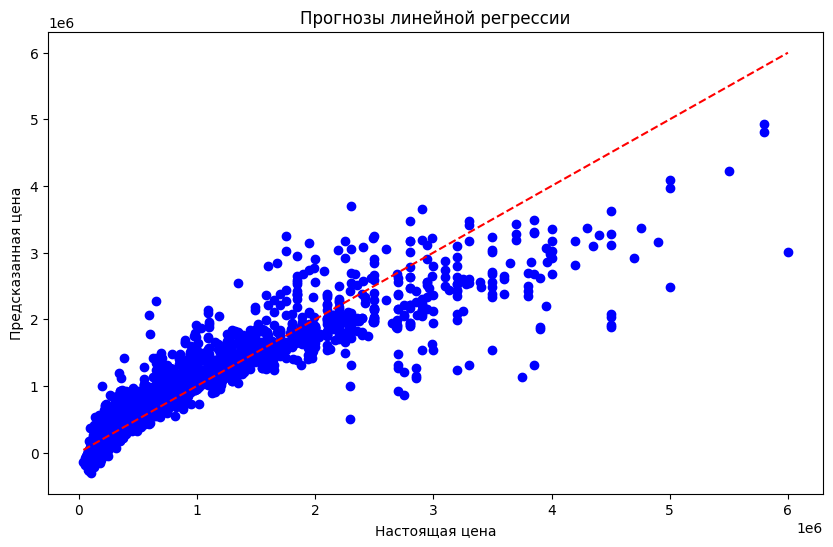

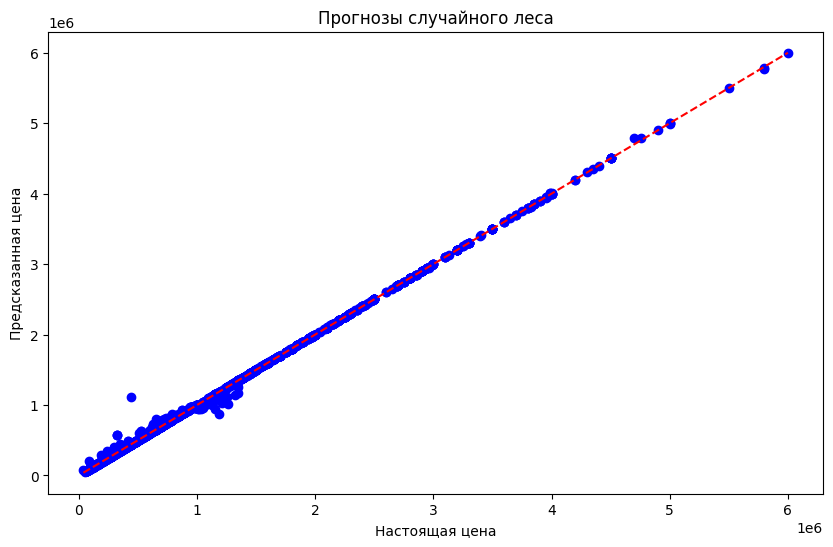

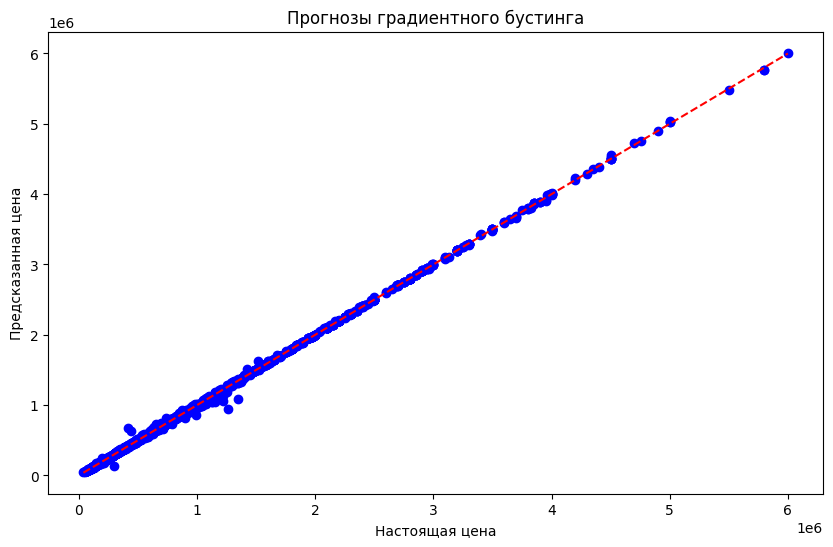

In [27]:
import matplotlib.pyplot as plt

# График для линейной регрессии
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_predictions, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Настоящая цена')
plt.ylabel('Предсказанная цена')
plt.title('Прогнозы линейной регрессии')
plt.show()

# График для случайного леса
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Настоящая цена')
plt.ylabel('Предсказанная цена')
plt.title('Прогнозы случайного леса')
plt.show()

# График для градиентного бустинга
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb_predictions, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Настоящая цена')
plt.ylabel('Предсказанная цена')
plt.title('Прогнозы градиентного бустинга')
plt.show()


Кажется, что лучше сработала модель случайного леса и градиентного бустинга, так как точки на втором из и третьем ображении расположены вдоль диагонали. На первом изображении видно, что для высоких настоящих цен модель линейной регрессии дает заниженный результат. 

Проверим, так ли это с помощью метрик.

Для корректного подсчета метрик качества модели в python требуется загрузить их из библиотеки sklearn. 

In [29]:
from sklearn.metrics import r2_score, mean_absolute_error, median_absolute_error

# Рассчет метрик для линейной регрессии
linear_r2 = r2_score(y_test, linear_predictions)
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_medianae = median_absolute_error(y_test, linear_predictions)

# Рассчет метрик для случайного леса
rf_r2 = r2_score(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_medianae = median_absolute_error(y_test, rf_predictions)

# Рассчет метрик для градиентного бустинга
xgb_r2 = r2_score(y_test, xgb_predictions)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_medianae = median_absolute_error(y_test, xgb_predictions)

# Вывод результатов
print("Метрики для линейной регрессии:")
print("R^2:", linear_r2)
print("MAE:", linear_mae)
print("Median AE:", linear_medianae)
print()

print("Метрики для случайного леса:")
print("R^2:", rf_r2)
print("MAE:", rf_mae)
print("Median AE:", rf_medianae)
print()

print("Метрики для градиентного бустинга:")
print("R^2:", xgb_r2)
print("MAE:", xgb_mae)
print("Median AE:", xgb_medianae)


Метрики для линейной регрессии:
R^2: 0.8528414808676721
MAE: 162874.51152548386
Median AE: 97993.4133607028

Метрики для случайного леса:
R^2: 0.9994057790904001
MAE: 2949.995717444623
Median AE: 8.10999999998603

Метрики для градиентного бустинга:
R^2: 0.9997159110732584
MAE: 4622.4145816567025
Median AE: 1694.34375


Метрика R^2 показывает, насколько хорошо модель объясняет вариацию целевой переменной. Значение R^2 близкое к 1 означает, что модель хорошо объясняет данные. MAE и Median AE измеряют среднюю и медианную абсолютные ошибки прогноза модели.

Исходя из метрик, случайный лес и градиентный бустинг показывают лучшие результаты, близкие к единице для R^2, а также низкие значения MAE и Median AE, что указывает на меньшую среднюю и медианную ошибку в прогнозах этих моделей. Линейная регрессия также дает разумные результаты, но несколько менее точные по сравнению с остальными моделями.